In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def f(x):
    return 0.6 - 13.2 * x - 5.3 * x ** 2 - 4.17 * x ** 3
np.random.seed(16)
x_data = np.random.uniform(-10, 10, 10)
f_data = [f(i) for i in x_data] + np.random.uniform(-1000, 1000, 10)

In [8]:
class linear_regression:
    def __init__(self, eta = 0.9, max_iter = 1e4, min_weight_dist = 1e-8):
        self.eta = eta
        self.max_iter = max_iter
        self.min_weight_dist = min_weight_dist
    def _mserror(self, X, y_real):
        #рассчёт среднеквадратичной ошибки
        y = X.dot(self.w.T)+self.w0
        return np.sum((y - y_real)**2) / y_real.shape[0]
    def _mserror_grad(self, X, y_real):
        #рассчёт градиента ошибки.
        #2*delta.T.dot(X)/y_real.shape[0] - градиент по коэффициентам при факторах
        #np.sum(2*delta)/y_real.shape[0] - производная(градиент) при нулевом коэффициенте
        delta=(X.dot(self.w.T)+self.w0-y_real)
        return 2*delta.T.dot(X)/y_real.shape[0], np.sum(2*delta)/y_real.shape[0]
    def _optimize(self, X, Y):
        #оптимизация коэффициентов
        iter_num = 0
        weight_dist = np.inf
        self.w = np.zeros((1, X.shape[1]))
        self.w0=0
        while weight_dist > self.min_weight_dist and iter_num < self.max_iter:
            gr_w, gr_w0=self._mserror_grad(X, Y)
            if iter_num==0:
                #Чтобы eta адаптировалась к порядку градиента, делим на l2 норму градиента в нуле
                eta=self.eta/np.sqrt(np.linalg.norm(gr_w)**2+(gr_w0)**2)
            new_w = self.w - eta * gr_w
            new_w0= self.w0 - eta * gr_w0
            weight_dist = np.sqrt(np.linalg.norm(new_w - self.w)**2+(new_w0 - self.w0)**2)
            iter_num += 1
            self.w = new_w
            self.w0 = new_w0
    def fit(self, X, Y):
        if Y.ndim==1:
            Y=Y[:, np.newaxis]
        self._optimize(X, Y)
    def predict(self, X):
        return (X.dot(self.w.T)+self.w0).flatten()
    def test(self, X, Y):
        if Y.ndim==1:
            Y=Y[:, np.newaxis]
        return self._mserror(X, Y)

In [9]:
class polynomial_regression(linear_regression):
    def __init__(self, max_power, *args, **kwargs):
        self.max_power=max_power
        super().__init__(*args, **kwargs)
    @staticmethod
    def generate_features(x, max_power):
        x=x[:, np.newaxis]
        return np.concatenate([x**i for i in range(1, max_power+1)], axis=1)
    def fit(self, x, y):
        super().fit(self.generate_features(x, self.max_power), y)
    def predict(self, x):
        return super().predict(self.generate_features(x, self.max_power)).flatten()
    def test(self, x, y):
        return super().test(self.generate_features(x, self.max_power), y)
    
class polynomial_regression_sklearn(sklearn_LR):
    def __init__(self, max_power, *args, **kwargs):
        self.max_power=max_power
        super().__init__(*args, **kwargs)
    generate_features=staticmethod(polynomial_regression.generate_features)
    def fit(self, x, y):
        super().fit(self.generate_features(x, self.max_power), y)
    def predict(self, x):
        return super().predict(self.generate_features(x, self.max_power))
    def test(self, x, y):
        return np.sum((self.predict(x) - y)**2) / y.shape[0]

In [10]:
polynomial_regression.generate_features(np.arange(6), 3)

array([[  0,   0,   0],
       [  1,   1,   1],
       [  2,   4,   8],
       [  3,   9,  27],
       [  4,  16,  64],
       [  5,  25, 125]], dtype=int32)

In [11]:
our_mod=polynomial_regression(2)
our_mod.fit(x_data, f_data)
print(our_mod.w)

[[-244.1943038    -8.45469064]]


In [12]:
our_mod.predict(x_data)

array([ 1041.950331  ,  -165.46323275,  -306.83531545,  1470.42505857,
         564.06648443,  1042.58317778, -1092.69286742,  1209.36489745,
        1423.59837175, -2862.11146925])

In [15]:
dots = np.linspace(-10, 10, 100)

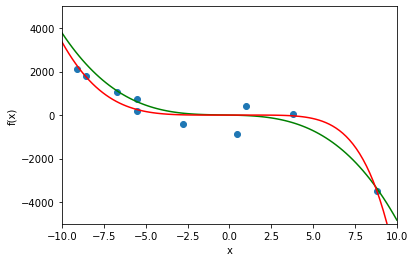

In [18]:
#Актуальные данные
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)
plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)

#Наша модель
model1 = polynomial_regression(6, 0.0005, max_iter = 1e5)
model1.fit(x_data, f_data)
plt.plot(dots, model1.predict(dots), color='r')

In [21]:
class ridge_regression(polynomial_regression):

    def __init__(self, max_power, c=1.0, *args, **kwargs):
        self.c = c
        super().__init__(max_power, *args, **kwargs)
 
    def _mserror(self, X, y_real):
        #рассчёт среднеквадратичной ошибки
        y = X.dot(self.w.T)+self.w0
        reg = no.sum(self.w**2)+self.w0**2
        return np.sum((y - y_real)**2) / y_real.shape[0]+self.c*reg
    def _mserror_grad(self, X, y_real):
        delta=(X.dot(self.w.T)+self.w0-y_real)
        reg_grad_w = 2*self.w
        reg_grad_w0 = 2*self.w0
        return (2*delta.T.dot(X)/y_real.shape[0]+self.c*reg_grad_w,
                np.sum(2*delta)/y_real.shape[0]+self.c*reg_grad_w0)


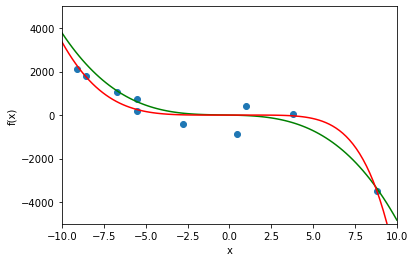

In [23]:
#Актуальные данные
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)
plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)

#Наша модель
model_r = ridge_regression(3)
model_r.fit(x_data, f_data)
plt.plot(dots, model1.predict(dots), color='r')